# Final Project Report

* Class: DS 5100
* Student Name: Katherine Kelleher
* Student Net ID: kbk8vh
* This URL: https://github.com/katherinekelleher/DS5100-Final-Project/blob/01a0675cf1b08f3a0dd7e9a6ef8ba1803fd7bd78/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/katherinekelleher/DS5100-Final-Project/tree/a813d0953fc56596e018193984bc553501497e87/package

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

import numpy as np
import pandas as pd

class Die():
    "Takes a NumPy array of faces and creates a die of N sides and W weights. Weights default to 1 for each side but can be updated."   
    def __init__(self, array_faces):
        "Initalize the object by defining the faces on the die. Faces must be all numeric or all text. Weights can be changed after initialization."
        self.array_faces = array_faces
        if isinstance(self.array_faces, np.ndarray) == False:
            raise TypeError("Input value must be of type np array.")
            
        if len(self.array_faces) != len(set(self.array_faces)):
            raise TypeError("Input values must be unique.")
        
        else:
            self.n_sides = len(self.array_faces)
            self.weights = [1] * self.n_sides
            self.my_probs = [i/sum(self.weights) for i in self.weights]
            self.die = pd.DataFrame({
            'side': self.array_faces,
            'weights': self.weights})
            self.die = self.die.set_index(['side'])
            
    def update_die_weight(self, face_value, weight_value):
        "Update weights of die object after initialization. Input is a face value that exists in die object and an integer or float for die weight. Changes weight of die."
        self.face_value = face_value
        self.weight_value = weight_value
        if isinstance(self.weight_value, (int, float)) == False:
                try:
                    self.weight_value = float(self.weight_value)
                except ValueError:
                    raise TypeError("Input weight value must be of type int, float, or coercible.")
        if face_value not in self.die.index.values:
            raise TypeError("Input face value must be within die array.")
        else: 
            self.die.loc[self.face_value, 'weights'] = self.weight_value

    def roll_dice(self, n_rolls=1):
        "Rolling die objects one or more times. Input is integer number of dice rolls and is initialized to 1, but can be changed. Creates series of rolls and values for all die objects."
        results = []
        for i in range(n_rolls):
            result = self.die.sample(weights=self.die.weights).index[0]
            results.append(result)
        return pd.Series(results)
    
class Game():
    "A game consists of rolling of one or more similar dice (Die objects) one or more times."
    def __init__(self, dice_list):
        "Initalize the object by a list of die objects."
        self.dice_list = dice_list
        
    def play(self, n_rolls):
        "Play game by rolling dice (Die objects) one or more times. Input is integer number of dice rolls. Creates data frame of rolls and values for all die objects."
        self.game_play_df = pd.DataFrame()
        for i in range(len(self.dice_list)):
            die = self.dice_list[i]
            self.game_play_df[i+1] = die.roll_dice(n_rolls)
            
        self.game_play_df.index.name = "Roll Number"
    
    def return_play_df(self, form):
        "Return game play from dice rolls in dataframe by entering input value of 'narrow' or 'wide.' Returns dataframe of die object rolls with varied format based on input option."
        self.form = form
        if self.form == "narrow":
            narrow_df = self.game_play_df.stack()
            narrow_df = narrow_df.reset_index()
            narrow_df.columns = ["Roll Number", "Die", "Face Value"]
            return narrow_df
        elif self.form == "wide":
            return self.game_play_df
        else:
            raise ValueError("Input face value must be 'narrow' or 'wide.'")
            
class Analyzer():
    "Takes an Game object and computes various descriptive statistical properties about it."
    def __init__(self, game_obj):
        "Initalize the class with a Game() object."
        self.game = game_obj
        if isinstance(self.game, Game) == False:
            raise ValueError("Input value must be a game object.")
        
    def jackpot(self):
        "Identify any jackpot results in die game."
        self.jackpot_columns = 0
        self.df = self.game.return_play_df("wide")
        same_values = self.df.apply(lambda row: row.nunique() == 1, axis=1)
        self.result_df = self.df[same_values]

        return len(self.result_df)
        
    def face_counts(self):
        "Computes how many times a given face is rolled in each event."
        self.game.play(n_rolls)
        self.df = self.game.return_play_df("wide")
        self.face_count_df = self.df.apply(lambda x: x.value_counts(), axis =1)
        return self.face_count_df
    
    def combo_count(self):
        "Computes the distinct combinations of faces rolled, along with their counts. Transforms Analyzer object's return_play_df('wide')."
        self.df_combo = self.game.return_play_df("wide")
        roll_sorted = self.df_combo.apply(lambda x:tuple(sorted(x)), axis =1)
        distinct_combinations_df = roll_sorted.value_counts(dropna=False).reset_index(name='count')
        return distinct_combinations_df
    
    def perm_count(self):
        "Computes the distinct permutations of faces rolled, along with their counts. Transforms Analyzer object's return_play_df('wide')."
        self.df_perm = self.game.return_play_df("wide")
        distinct_permutations_df = self.df_perm.value_counts(dropna=False).reset_index(name='count')
        return distinct_permutations_df

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

from montecarlo import Die, Game, Analyzer
import unittest
import pandas as pd
import numpy as np

class montecarloTestDie(unittest.TestCase): 
    def test_create_die_structure(self): #test
        faces = np.array([1,2,3,4,5,6])
        die = Die(faces)
        expected_df = pd.DataFrame({
            'weights':[1,1,1,1,1,1],
            'side':faces})
        
        weights_equal = (expected_df['weights'].values == die.die['weights'].values).all()
        faces_equal = (die.die.index.values == expected_df['side'].values).all()
        self.assertEqual(weights_equal, True)
        self.assertEqual(faces_equal, True)
 
    def test_update_die_weight(self): #
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        die.update_die_weight(3, 5)
        
        self.assertEqual(die.die.loc[3, 'weights'], 5)

    def test_play_game_structure(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)

        self.assertEqual(game.game_play_df.shape, (5, 2))


    def test_return_play_df(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        narrow_df = game.return_play_df('narrow')
        wide_df = game.return_play_df('wide')
        
        
        self.assertEqual(narrow_df.shape[0], 10)
        self.assertListEqual(list(narrow_df.columns), ["Roll Number", "Die", "Face Value"])
        self.assertEqual(wide_df.shape, (5, 2))
        
    def test_analyzer_jackpot(self): #check
        faces = np.array([1, 2]) 
        die = Die(faces)
        game = Game([die, die])
        analyzer = Analyzer(game)
        game.play(5)
        jackpot_count = analyzer.jackpot()
        
        self.assertLess(jackpot_count, 6)

    def test_analyzer_face_counts(self): #check
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        analyzer = Analyzer(game)
        game.play(5)
        face_counts_df = analyzer.face_counts()
        self.assertEqual(len(face_counts_df), 5)  # 5 rolls
        self.assertTrue(all(face_counts_df.columns.isin(faces)))  # Columns should be the faces
        
    def test_analyzer_combo_counts(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die, die])
        analyzer = Analyzer(game)
        game.play(5)
        combo_df = analyzer.combo_count()
        
        self.assertEqual(sum(combo_df['count']), 5)
        #self.assertTrue(all(isinstance(x, tuple) for x in combo_df[0]))

 
    def test_perm_count_structure(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die, die])
        analyzer = Analyzer(game)
        game.play(5)
        perm_df = analyzer.perm_count()
        list_in = perm_df[1].isin(faces)
        
        self.assertEqual(sum(perm_df['count']), 5)
        self.assertTrue(len(perm_df[list_in]) == len(perm_df))

                
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

-bash-4.4$python3 montecarlotest.py
test_analyzer_combo_counts (__main__.montecarloTestDie) ... ok
test_analyzer_face_counts (__main__.montecarloTestDie) ... ok
test_analyzer_jackpot (__main__.montecarloTestDie) ... ok
test_create_die_structure (__main__.montecarloTestDie) ... ok
test_perm_count_structure (__main__.montecarloTestDie) ... ok
test_play_game_structure (__main__.montecarloTestDie) ... ok
test_return_play_df (__main__.montecarloTestDie) ... ok
test_update_die_weight (__main__.montecarloTestDie) ... ok
----------------------------------------------------------------------
Ran 8 tests in 0.095s
OK

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import os 
os.getcwd()
os.chdir("/sfs/gpfs/tardis/home/kbk8vh/Documents/MSDS/DS5100/DS5100-katherinekelleher/lessons/M09/DS5100-Final-Project/")
from package.montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module package.montecarlo:

class Die(builtins.object)
 |  Die(array_faces)
 |  
 |  Takes a NumPy array of faces and creates a die of N sides and W weights. Weights default to 1 for each side but can be updated.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, array_faces)
 |      Initalize the object by defining the faces on the die. Faces must be all numeric or all text. Weights can be changed after initialization.
 |  
 |  roll_dice(self, n_rolls=1)
 |      Rolling die objects one or more times. Input is integer number of dice rolls and is initialized to 1, but can be changed. Creates series of rolls and values for all die objects.
 |  
 |  update_die_weight(self, face_value, weight_value)
 |      Update weights of die object after initialization. Input is a face value that exists in die object and an integer or float for die weight. Changes weight of die.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors

# help(montecarlo)

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/katherinekelleher/DS5100-Final-Project/blob/702b27acc19dc9902760e7933ac2cf81eddffc95/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

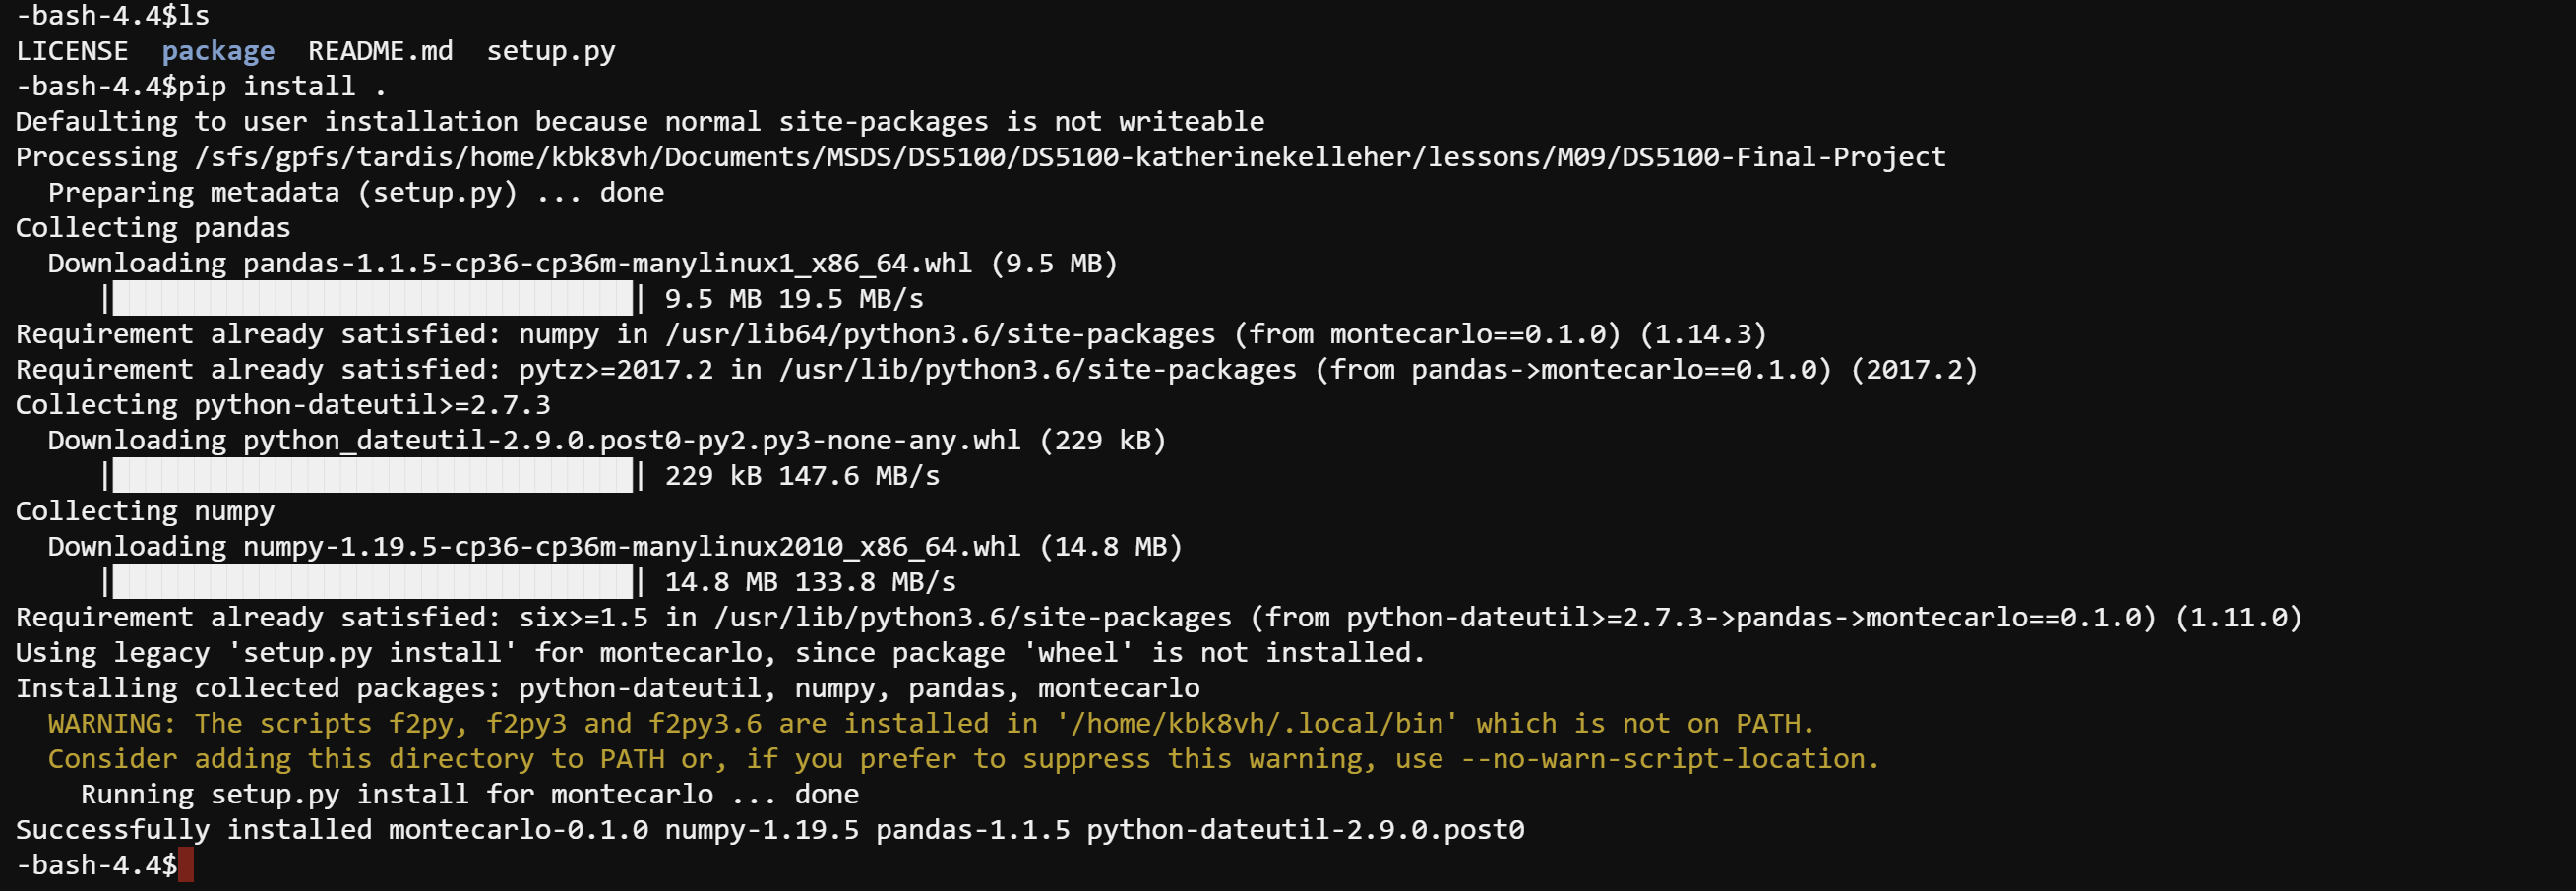

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import pandas as pd
import numpy as np

fair = np.array(["T", "H"])
unfair = np.array(["T", "H"])

die1 = Die(fair)
die2 = Die(unfair)

die2.update_die_weight("T",5)


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
game = Game([die1, die1])
game.play(1000)
#game.play(20)
#game.return_play_df("wide")

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
game2 = Game([die1, die2, die2])
game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
test_analyzer1 = Analyzer(game)
test_analyzer1.jackpot()

491

In [7]:
test_analyzer2 = Analyzer(game2)
test_analyzer2.jackpot()

0

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [17]:
freq1 = test_analyzer1.jackpot()/1000
freq2 = test_analyzer2.jackpot()/1000

df = pd.DataFrame({'Game': ["Game1", "Game2"], 
    'Freq': [freq1, freq2]})

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<Axes: xlabel='Game'>

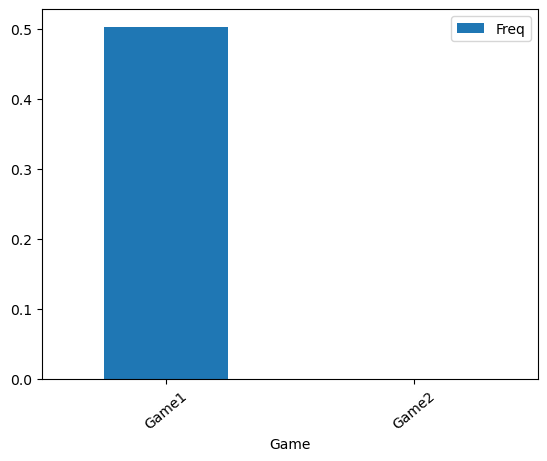

In [18]:
df.plot.bar(x = 'Game', y = ['Freq'], rot = 40)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [7]:
faces1 = np.array([1,2,3,4,5,6])
faces2 = np.array([1,2,3,4,5,6])
faces3 = np.array([1,2,3,4,5,6])

die3 = Die(faces1)
die4 = Die(faces2)
die5 = Die(faces3)


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [8]:
die3.update_die_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [9]:
die4.update_die_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [49]:
game4 = Game([die5, die5, die5, die5, die5])
game4.play(1000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [45]:
game5 = Game([die3, die4, die5, die5, die5])
game5.play(1000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [50]:
test_analyzer4 = Analyzer(game4)
test_analyzer4.jackpot()

1

In [46]:
test_analyzer5 = Analyzer(game5)
test_analyzer5.jackpot()

2

<Axes: xlabel='Game'>

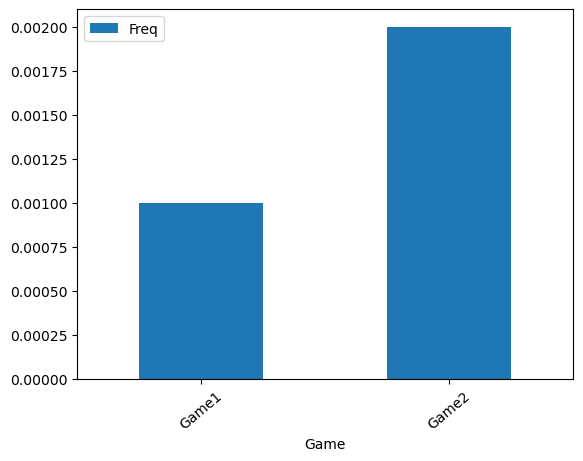

In [52]:
freq4 = test_analyzer4.jackpot()/1000
freq5 = test_analyzer5.jackpot()/1000

df1 = pd.DataFrame({'Game': ["Game1", "Game2"], 
    'Freq': [freq4, freq5]})

df1.plot.bar(x = 'Game', y = ['Freq'], rot = 40)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [10]:
df3 = pd.read_csv('english_letters.txt', sep="\t", header=None)
df3[['Letter', 'Weight']] = df3[0].str.split(' ', expand=True)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [11]:
del df3[0]

In [12]:
df3['Weight'] = df3['Weight'].astype(float)
faces6 = df3['Letter'].to_numpy()
df3['Letter'] = df3['Letter'].to_numpy()

In [13]:
df3.set_index('Letter', inplace=True)

In [14]:
df3.index = df3.index.to_numpy()

In [15]:
die6 = Die(faces6)
for face, weight in df3['Weight'].items():
    die6.update_die_weight(face, weight) 
    #print(f"Index: {x}, Type {type()}of index: {type(x)}")

In [16]:
game6 = Game([die6, die6, die6, die6, die6, die6])
game6.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [13]:
test_analyzer6 = Analyzer(game6)

In [14]:
df4 = pd.read_csv('scrabble_words.txt', sep="\t", header=None)

In [15]:
df_comb6 = test_analyzer6.perm_count().iloc[:,0:6].apply(lambda row: ''.join(row), axis =1)

In [16]:
df6_perm_output = test_analyzer6.perm_count()

In [17]:
df6_perm_output['combined_word'] = df_comb6

In [34]:
df6vals_inscrabble = df6_perm_output['combined_word'].isin(df4[0])
total_sum = df6_perm_output.loc[df6vals_inscrabble, 'count'].sum()
print(f"The game with five dice produced {total_sum} scrabble word(s)")

The game with five dice produced 1 scrabble word(s)


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

The game with five dice and 1000 rolls produced 11 words, which is 10 more than the game with six dice.

In [19]:
game7 = Game([die6, die6, die6, die6, die6])
game7.play(1000)
test_analyzer7 = Analyzer(game7)

In [20]:
df_comb7 = test_analyzer7.perm_count().iloc[:,0:5].apply(lambda row: ''.join(row), axis =1)

In [21]:
df7_perm_output = test_analyzer7.perm_count()
df7_perm_output['combined_word'] = df_comb7

In [28]:
df7_perm_output.loc[df7_perm_output['count'] == 2]

,1,2,3,4,5,count,combined_word
0,E,D,N,T,T,2,EDNTT


In [32]:
df7vals_inscrabble = df7_perm_output['combined_word'].isin(df4[0])
total_sum7 = df7_perm_output.loc[df7vals_inscrabble, 'count'].sum()
print(f"The game with five dice produced {total_sum7} scrabble words")

The game with five dice produced 11 scrabble words


In [ ]:
df7_perm_output.perm_count()